# Credit Risk scoring Project

Getting the data

In [312]:
import pandas as pd
import numpy as np

In [313]:
data = pd.read_csv('https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv')

In [314]:
data

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


# 6.2 Data cleaning and preparation

In [315]:
data.columns = data.columns.str.lower()

In [316]:
data.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [317]:
data.status = data.status.map({1 : 'ok', 2: 'default' , 0: 'unknown'})

In [318]:
data.home.value_counts()

home
2    2107
1     973
5     783
6     319
3     247
4      20
0       6
Name: count, dtype: int64

In [319]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
data.home = data.home.map(home_values)

In [320]:
data.marital.value_counts()

marital
2    3241
1     978
4     130
3      67
5      38
0       1
Name: count, dtype: int64

In [321]:
martial_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
data.marital = data.marital.map(martial_values)

In [322]:
data.records.value_counts()

records
1    3682
2     773
Name: count, dtype: int64

In [323]:
record_values = {
    1: 'no',
    2: 'yes',
    3: 'unk'
}
data.records = data.records.map(record_values)

In [324]:
data.job.value_counts()

job
1    2806
3    1024
2     452
4     171
0       2
Name: count, dtype: int64

In [325]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}
data.job = data.job.map(job_values)

In [326]:
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [327]:
data.describe().round(2)

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00
mean,7.99,46.44,37.08,55.57,763316.99,1060340.81,404381.96,1039.02,1462.88
std,8.17,14.66,10.98,19.52,8703625.26,10217568.67,6344253.40,474.54,628.09
min,0.00,6.00,18.00,35.00,0.00,0.00,0.00,100.00,105.00
25%,2.00,36.00,28.00,35.00,80.00,0.00,0.00,700.00,1117.50
50%,5.00,48.00,36.00,51.00,120.00,3500.00,0.00,1000.00,1400.00
75%,12.00,60.00,45.00,72.00,166.00,6000.00,0.00,1300.00,1692.00
max,48.00,72.00,68.00,180.00,99999999.00,99999999.00,99999999.00,5000.00,11140.00


In [328]:
for c in ['income' , 'assets' , 'debt']:
    data[c] = data[c].replace( to_replace = 99999999 , value=np.nan)

In [329]:
data.status.value_counts()

status
ok         3200
default    1254
unknown       1
Name: count, dtype: int64

In [330]:
data = data[data.status != 'unknown'].reset_index(drop=True)

In [331]:
from sklearn.model_selection import train_test_split
full_train_data , test_data = train_test_split( data , test_size=0.2 , random_state=11 )
train_data , valid_data = train_test_split( full_train_data , test_size=0.25 , random_state=11 )

In [333]:
train_data.shape , valid_data.shape , test_data.shape

((2672, 14), (891, 14), (891, 14))

In [334]:
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [335]:
y_train = (train_data.status == 'default').astype(int).values
y_test = (test_data.status == 'default').astype(int).values
y_valid = (valid_data.status == 'default').astype(int).values

In [336]:
y_train

array([1, 1, 0, ..., 0, 0, 0], shape=(2672,))

In [337]:
del train_data['status']
del valid_data['status']
del test_data['status']

In [338]:
train_data.columns

Index(['seniority', 'home', 'time', 'age', 'marital', 'records', 'job',
       'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

# 6.3 Decision trees <br>
Decision Trees are powerful algorithms, capable of fitting complex datasets. The decision trees make predictions based on the bunch of if/else statements by splitting a node into two or more sub-nodes.<br>

With versatility, the decision tree is also prone to overfitting. One of the reasons why this algorithm often overfits is its depth. It tends to memorize all the patterns in the train data but struggles to perform well on the unseen data (validation or test set).<br>

To overcome the overfitting problem, we can reduce the complexity of the algorithm by reducing the depth size.<br>

A decision tree with a depth of 1 is called decision stump and has only one split from the root.<br>

In [339]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [340]:
train_dicts = train_data.fillna(0).to_dict(orient='records')
val_dicts = valid_data.fillna(0).to_dict(orient='records')
test_dicts = test_data.fillna(0).to_dict(orient='records')
train_dicts

[{'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 0.0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 1000,
  'price': 1400},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,
  'marital': 'single',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 35,
  'income': 85.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1100,
  'price': 1330},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 40,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 75,
  'income': 121.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1320,
  'price': 1600},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 23,
  'marital': 'single',
  'records': 'no',
  'job': 'partime',
  'expenses': 35,
  'income': 72.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1078,
  'price': 1079},
 {'seniority': 5,
  'home': 'owner',
  'time': 36,
  'age': 46,
  'm

In [341]:
dv  = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_valid = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [342]:
dt = DecisionTreeClassifier()


In [343]:
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [344]:
y_pred = dt.predict_proba(X_valid)[:, 1]
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

In [345]:
X_train.shape, X_valid.shape, X_test.shape 

((2672, 29), (891, 29), (891, 29))

In [346]:
roc_auc_score(y_valid , y_pred)

np.float64(0.6486492213799617)

In [347]:
y_pred = dt.predict_proba(X_train)[:,1]

In [348]:
roc_auc_score(y_train , y_pred)

np.float64(1.0)

In [357]:
det = DecisionTreeClassifier(max_depth=15)
det.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=15)

In [387]:

y_pred = det.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train , y_pred)
print(f"train :  {auc}")

y_pred = det.predict_proba(X_valid)[:,1]
auc = roc_auc_score(y_valid , y_pred)
print(f"train :  {auc}")


train :  0.8488997098755001
train :  0.7726895691555061


In [389]:
from sklearn.tree import export_text
r = export_text(det , feature_names=dv.get_feature_names_out().tolist())
print(r)

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- income <= 20.00
|   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- seniority >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  20.00
|   |   |   |   |   |--- amount <= 977.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- amount >  977.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  4250.00
|   |   |   |   |--- seniority <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- seniority >  2.50
|   |   |   |   |   |--- amount <= 1125.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- amount >  1125.00
|   |   |   |   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   |   |   |   |--- amount <= 1330.00
|   |   |   |   |   |--- assets <= 3326.00
|   |   |   |   |   |   |--- cl

# 6.4 Decision tree learning algorithm

# 6.5 Decision trees parameter tuning<br>
Selecting Max depth <br>
selecting min samples leaf

In [390]:
score = []
for d in [4,5,6]:
    for l in [1,2,3,4,5,10,15,20,25,30,35]:
        det = DecisionTreeClassifier(max_depth=d , min_samples_leaf=l )
        det.fit(X_train , y_train)

        y_pred = det.predict_proba(X_train)[:,1]
        auc_train = roc_auc_score(y_train , y_pred)
        score.append((d , l , auc_train))

        print(f"max_depth : {d} , min_samples_leaf : {l} => train_auc : {auc_train} ")

max_depth : 4 , min_samples_leaf : 1 => train_auc : 0.8164293560926146 
max_depth : 4 , min_samples_leaf : 2 => train_auc : 0.8164293560926146 
max_depth : 4 , min_samples_leaf : 3 => train_auc : 0.8164293560926146 
max_depth : 4 , min_samples_leaf : 4 => train_auc : 0.8164293560926146 
max_depth : 4 , min_samples_leaf : 5 => train_auc : 0.8164293560926146 
max_depth : 4 , min_samples_leaf : 10 => train_auc : 0.8164293560926146 
max_depth : 4 , min_samples_leaf : 15 => train_auc : 0.817233888231649 
max_depth : 4 , min_samples_leaf : 20 => train_auc : 0.816833206579911 
max_depth : 4 , min_samples_leaf : 25 => train_auc : 0.8156980592642668 
max_depth : 4 , min_samples_leaf : 30 => train_auc : 0.8150808405160272 
max_depth : 4 , min_samples_leaf : 35 => train_auc : 0.8113116866655399 
max_depth : 5 , min_samples_leaf : 1 => train_auc : 0.8433781899611289 
max_depth : 5 , min_samples_leaf : 2 => train_auc : 0.8433781899611289 
max_depth : 5 , min_samples_leaf : 3 => train_auc : 0.843378

In [391]:
df_score = pd.DataFrame(score , columns=['max_depth' , 'min_samples_leaf' , 'auc_train'])
df_score

,max_depth,min_samples_leaf,auc_train
0,4,1,0.816429
1,4,2,0.816429
2,4,3,0.816429
3,4,4,0.816429
4,4,5,0.816429
5,4,10,0.816429
6,4,15,0.817234
7,4,20,0.816833
8,4,25,0.815698
9,4,30,0.815081


In [392]:
df_score.sort_values(by='auc_train' , ascending=False)

,max_depth,min_samples_leaf,auc_train
22,6,1,0.874474
23,6,2,0.873591
26,6,5,0.873373
24,6,3,0.873080
25,6,4,0.871558
27,6,10,0.865779
28,6,15,0.861244
29,6,20,0.858795
30,6,25,0.856545
31,6,30,0.854138


In [393]:
df_score_pivot = df_score.pivot(index='min_samples_leaf' , columns=['max_depth'] , values=['auc_train'])
df_score_pivot

auc_train                    
max_depth                4         5         6
min_samples_leaf                              
1                 0.816429  0.843378  0.874474
2                 0.816429  0.843378  0.873591
3                 0.816429  0.843378  0.873080
4                 0.816429  0.843378  0.871558
5                 0.816429  0.843391  0.873373
10                0.816429  0.842725  0.865779
15                0.817234  0.840487  0.861244
20                0.816833  0.837485  0.858795
25                0.815698  0.837703  0.856545
30                0.815081  0.835940  0.854138
35                0.811312  0.830986  0.848900

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

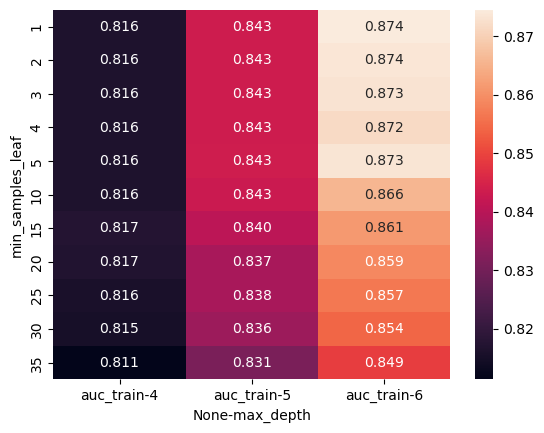

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_score_pivot , annot=True , fmt=".3f")

In [395]:
from sklearn.ensemble import RandomForestClassifier


In [396]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [397]:
y_pred = rf.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid , y_pred)

np.float64(0.7825070838681554)

In [ ]:
score = []
for d in [5,10,15]:
    for n in range(10 , 201 ,10):
        rf = RandomForestClassifier(n_estimators=n , max_depth=d )
        rf.fit(X_train,y_train)

        y_pred = rf.predict_proba(X_train)[:,1]
        auc_train = roc_auc_score(y_train , y_pred)
        score.append((d, n , auc_train))

In [399]:
df_score_r = pd.DataFrame(score, columns=['max_depth','n_estimators', 'auc'])

In [400]:
df_score_r

,max_depth,n_estimators,auc
0,5,10,0.857939
1,5,20,0.869041
2,5,30,0.875296
3,5,40,0.871891
4,5,50,0.870503
5,5,60,0.868480
6,5,70,0.871801
7,5,80,0.874714
8,5,90,0.872822
9,5,100,0.873797


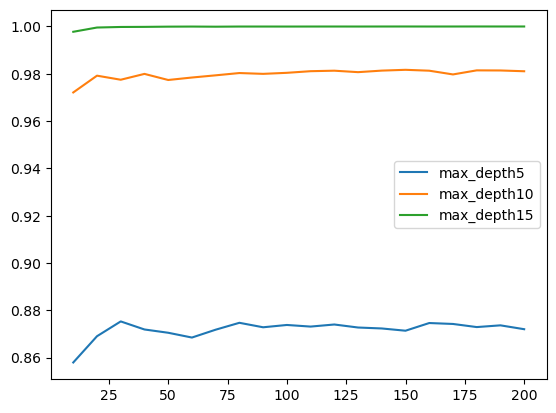

In [401]:
for d in [5,10,15]:
    df_sub = df_score_r[df_score_r.max_depth == d]
    plt.plot(df_sub.n_estimators, df_sub.auc, label='max_depth%d' % d)

plt.legend()

In [402]:
score_leaf = []
for s in [1,2,3,4,5,10,50]:
    for n in range(10 , 201 ,10):
        rf = RandomForestClassifier(n_estimators=n , max_depth=15, min_samples_leaf=s)
        rf.fit(X_train,y_train)

        y_pred = rf.predict_proba(X_train)[:,1]
        auc_train = roc_auc_score(y_train , y_pred)
        score_leaf.append((s , n , auc_train))

df_score_leaf = pd.DataFrame(score_leaf, columns=['min_samples_leaf','n_estimators', 'auc'])


In [403]:
df_score_leaf

,min_samples_leaf,n_estimators,auc
0,1,10,0.997655
1,1,20,0.999724
2,1,30,0.999775
3,1,40,0.999859
4,1,50,0.999906
...,...,...,...
135,50,160,0.860214
136,50,170,0.862103
137,50,180,0.858770
138,50,190,0.860774


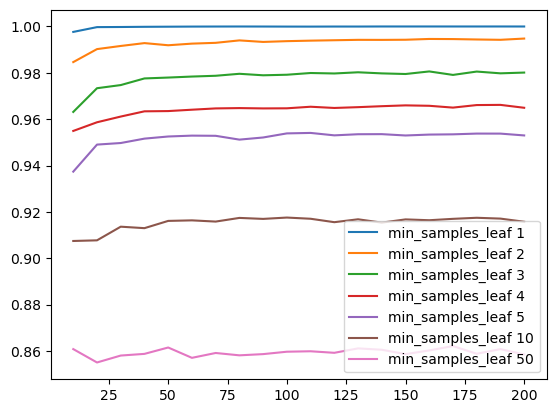

In [406]:
for d in [1,2,3,4,5,10,50]:
    df_sub = df_score_leaf[df_score_leaf.min_samples_leaf == d]
    plt.plot(df_sub.n_estimators, df_sub.auc, label='min_samples_leaf %d' % d)

plt.legend()

In [407]:
rf = RandomForestClassifier(n_estimators=200 , max_depth=15, min_samples_leaf=1)
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=15, n_estimators=200)

In [414]:
import xgboost as xgb
feature = dv.get_feature_names_out().tolist()
feature

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [422]:
X_train.shape, X_valid.shape, X_test.shape

((2672, 29), (891, 29), (891, 29))

In [423]:
dtrain = xgb.DMatrix(X_train , label=y_train , feature_names=feature)
dvalid = xgb.DMatrix(X_valid , label=y_valid , feature_names=feature)

In [442]:
%%capture output

xgb_params = {
    'eta' : 0.3,
    'max_depth' : 6,
    'min_child_weight' : 1,
    'objective' : 'binary:logistic',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1,
    'eval_metric' : 'auc',
}
watchlist = [(dtrain , 'train') , (dvalid , 'valid')]
model = xgb.train(xgb_params, dtrain,evals=watchlist,verbose_eval=5, num_boost_round=200)
model

In [446]:
s = output.stdout

In [464]:
line = s.split('\n')[0]
line

'[0]\ttrain-auc:0.86653\tvalid-auc:0.77999'

In [466]:
line.split('\t')

['[0]', 'train-auc:0.86653', 'valid-auc:0.77999']

In [478]:
num_itr , train_auc , valid_auc = line.split('\t')
num_itr , train_auc , valid_auc

('[0]', 'train-auc:0.86653', 'valid-auc:0.77999')

In [497]:
int(num_itr.strip('[]'))

0

In [498]:
float(train_auc.split(':')[1])

0.86653

In [499]:
float(valid_auc.split(':')[1])

0.77999

In [501]:
def parse(output):
    result = []
    
    for l in output.stdout.strip().split('\n'):
        it_line,train_line,val_lin = l.split('\t')
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_lin.split(':')[1])

        result.append((it,train,val))
        columns = ['num_iterations' , 'train_auc' , 'valid_auc']
    df_result1 = pd.DataFrame(result , columns=columns)


    return df_result1

        


In [503]:
df_score_x = parse(output)

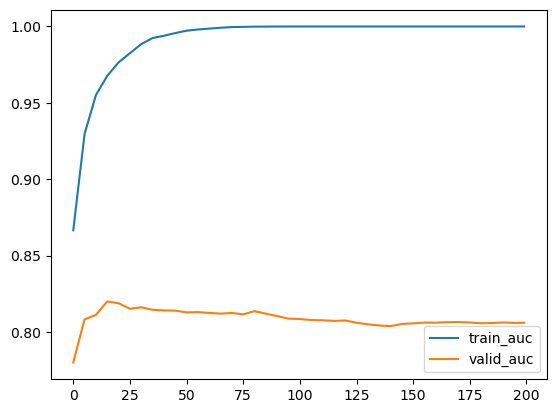

In [506]:
plt.plot(df_score_x.num_iterations , df_score_x.train_auc , label='train_auc')
plt.plot(df_score_x.num_iterations , df_score_x.valid_auc , label='valid_auc')
plt.legend()

In [443]:
y_pred = model.predict(dvalid)

In [444]:
roc_auc_score(y_valid , y_pred)

np.float64(0.8060200770143614)